<a href="https://colab.research.google.com/github/ajayjai30/HEART-DEISEASE-PREDICTION/blob/main/Heart_disease_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dataset.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


getting information about mean,median,mode and quartiles

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.shape

(303, 14)

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

checking for missing values

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

finding the correlations

In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


visualization

age


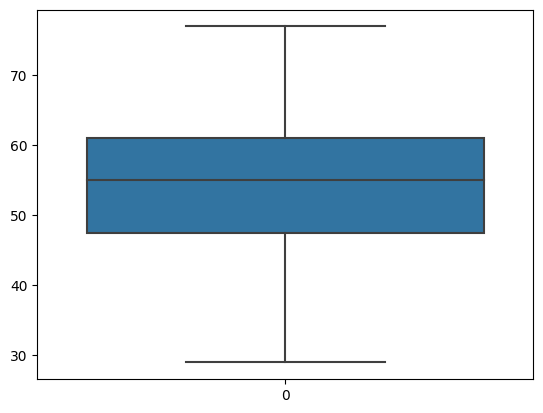

sex


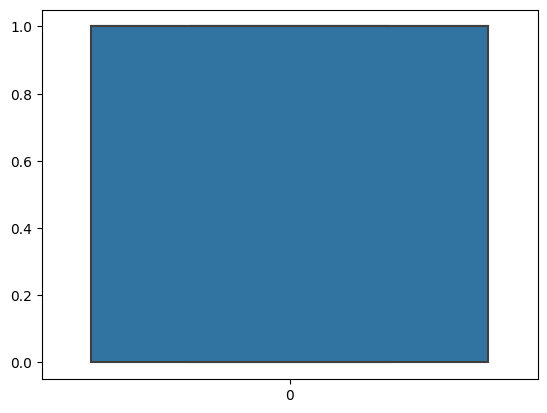

cp


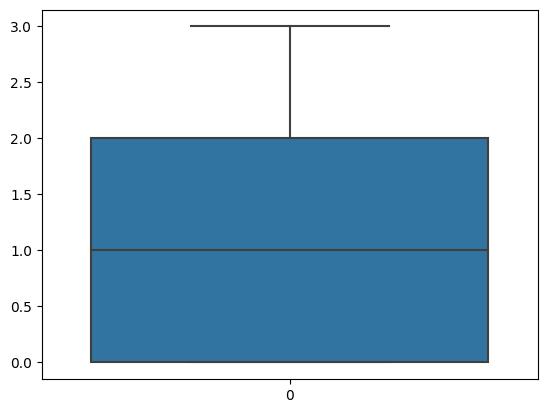

trestbps


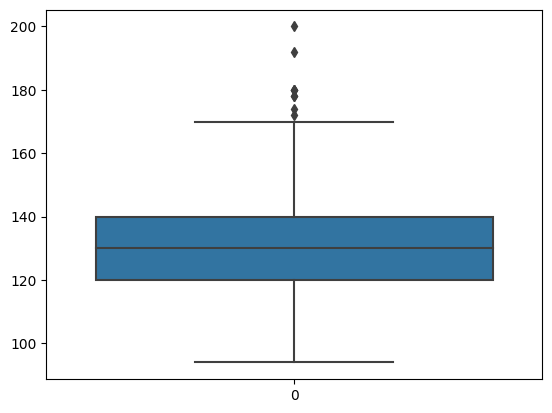

chol


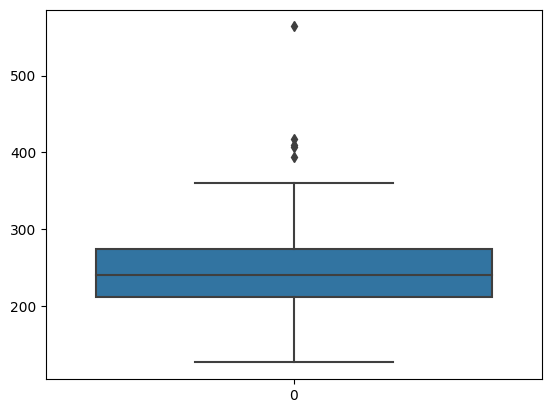

fbs


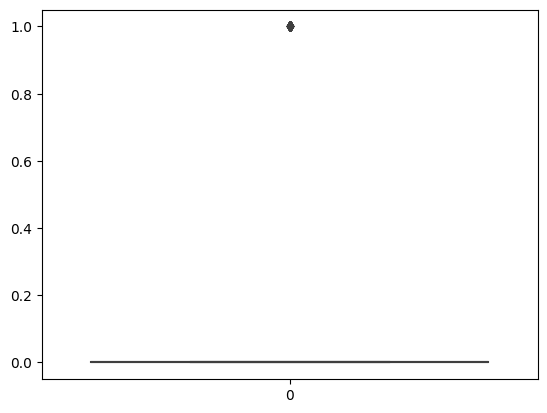

restecg


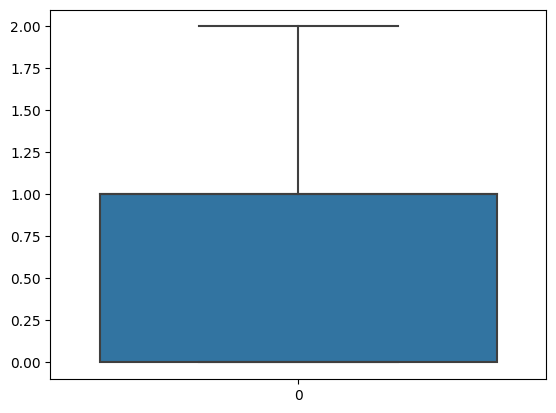

thalach


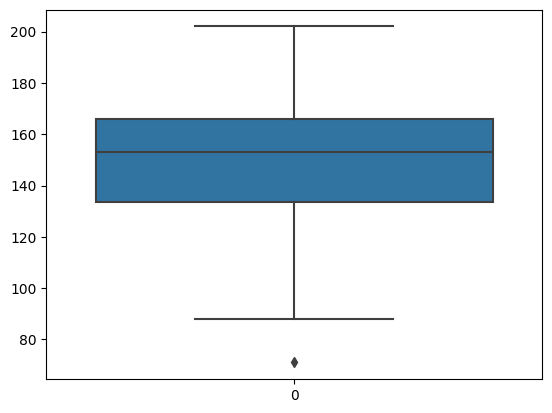

exang


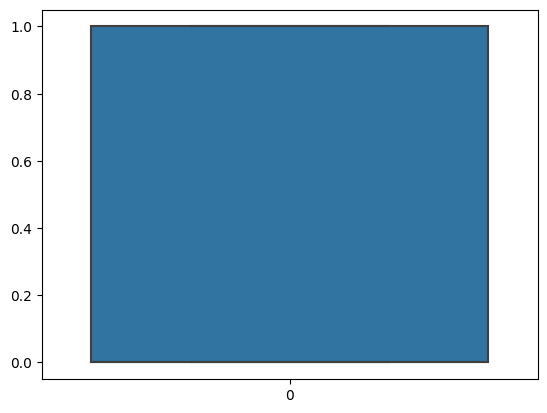

oldpeak


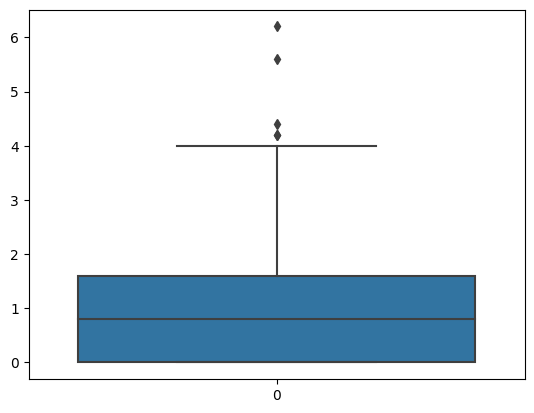

slope


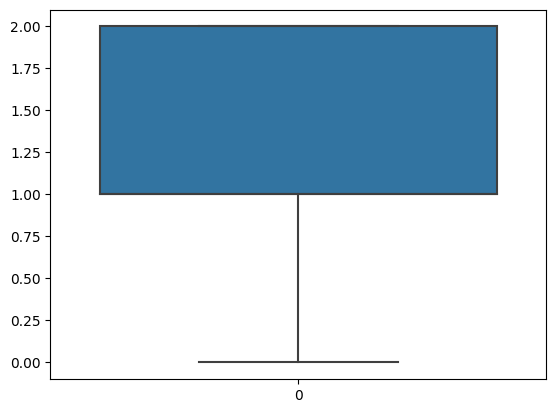

ca


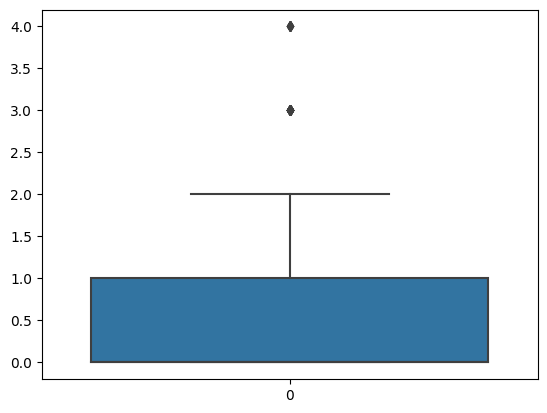

thal


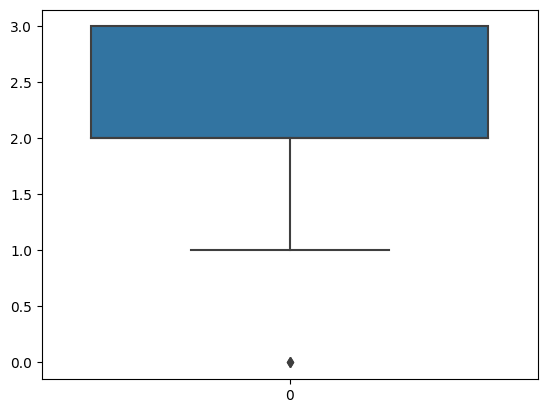

target


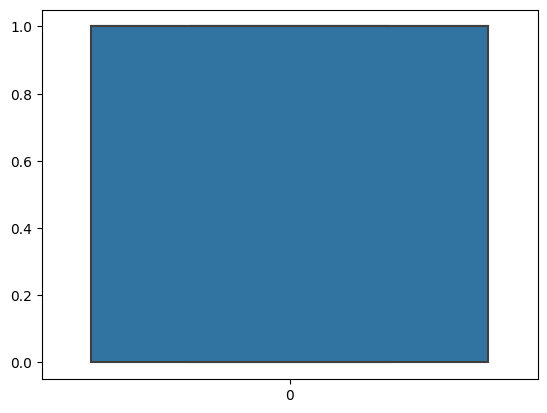

In [ ]:
for i in df.columns:
  print(i)
  sns.boxplot(df[i])
  plt.show()

In [ ]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

verifying count of patients without using countplot

In [ ]:
df1=df['target']
df1=df1.replace([1,0],['Having_Heart_Disease','Not_Having_Heart_Disease'])

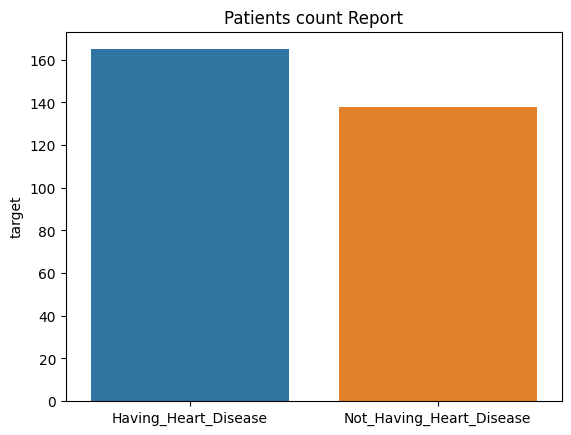

In [ ]:
#visualizing the no of heartpatients
sns.barplot(x=df1.value_counts().index,y=df1.value_counts())
plt.title('Patients count Report')
plt.show()

verifying no of patients using countplot

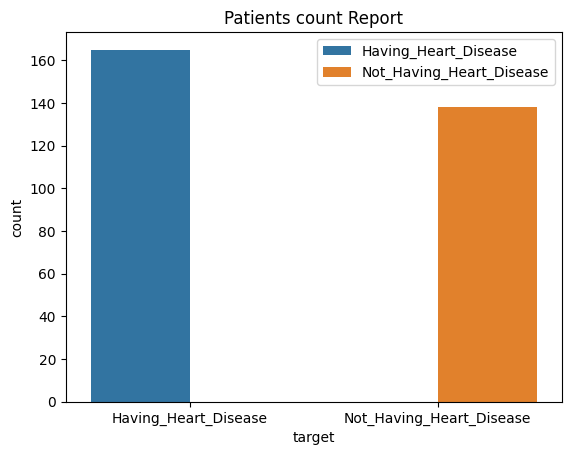

In [ ]:
sns.countplot(x=df1,hue=df1)
plt.title('Patients count Report')
plt.legend(loc='best')
plt.show()

visualizing the age of the patients

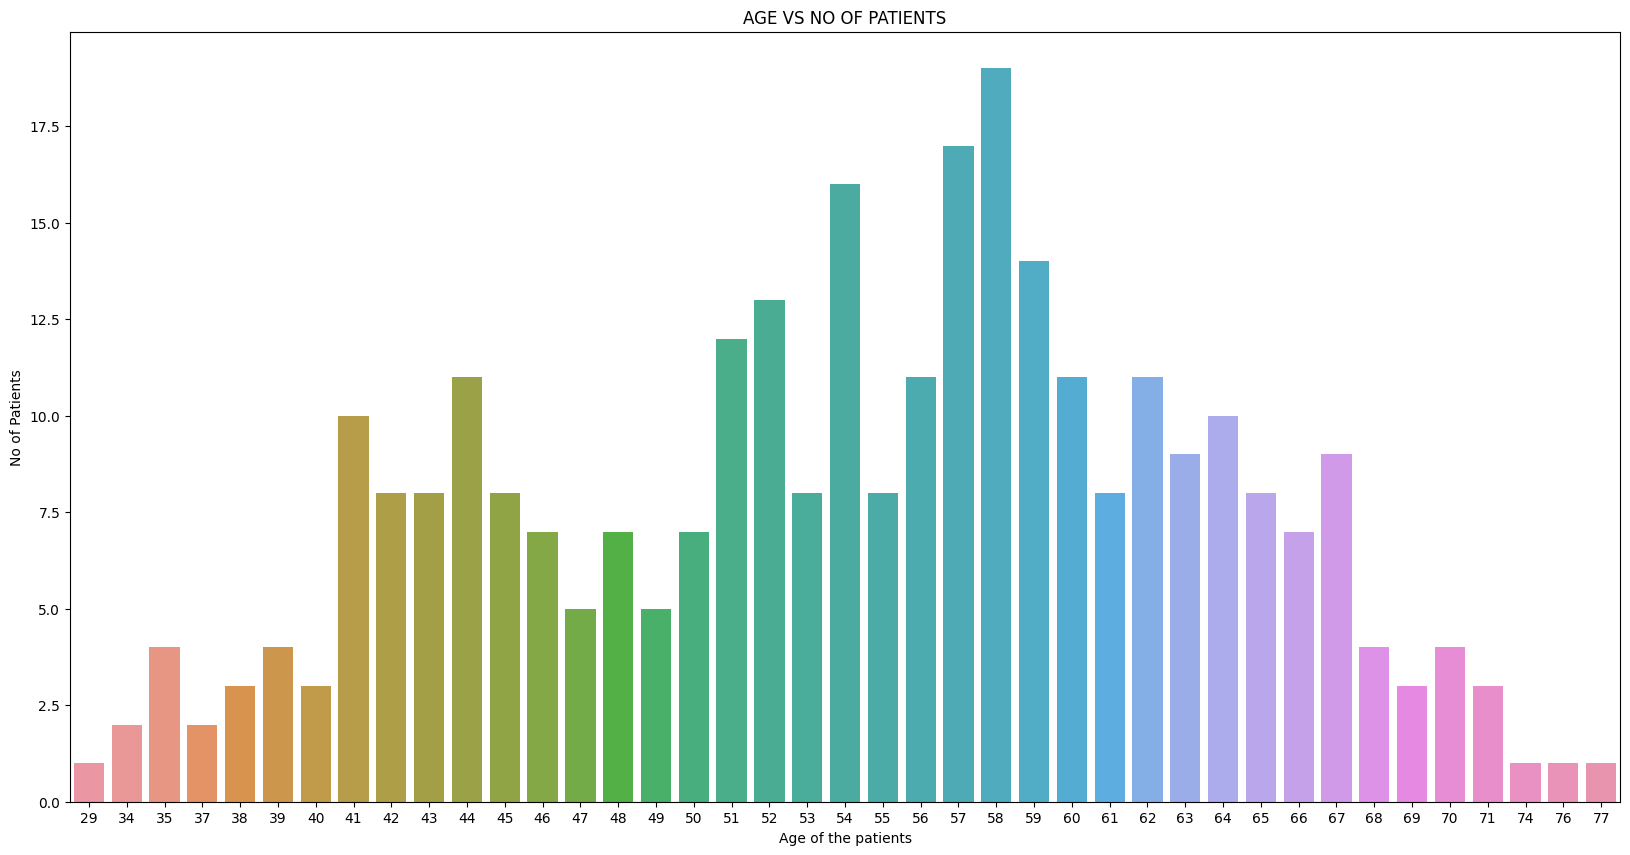

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['age'].value_counts().index,y=df['age'].value_counts())
plt.xlabel('Age of the patients')
plt.ylabel('No of Patients')
plt.title("AGE VS NO OF PATIENTS")
plt.show()

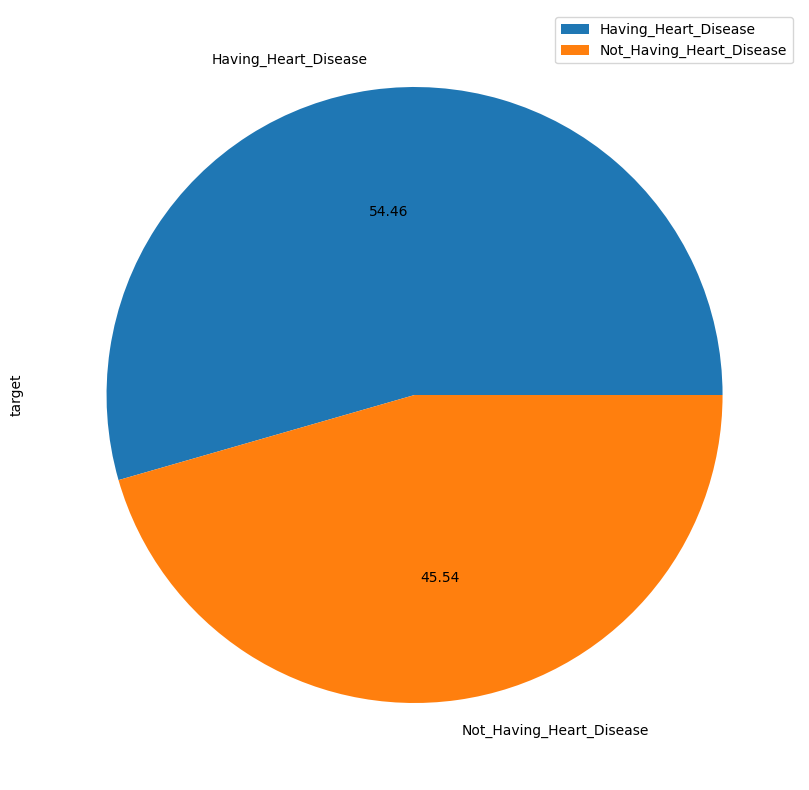

In [ ]:
#visualizing the age of patients
plt.figure(figsize=(20,10))
df1.value_counts().plot.pie(autopct='%0.2f')
plt.legend(loc='best')
plt.show()

checking for outliers

age


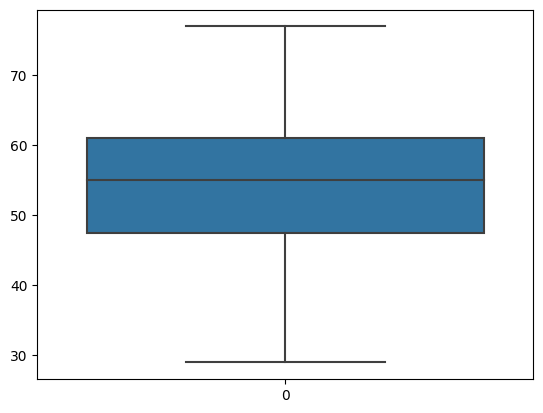

sex


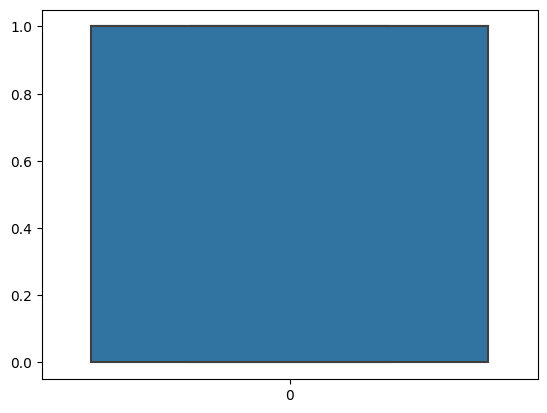

cp


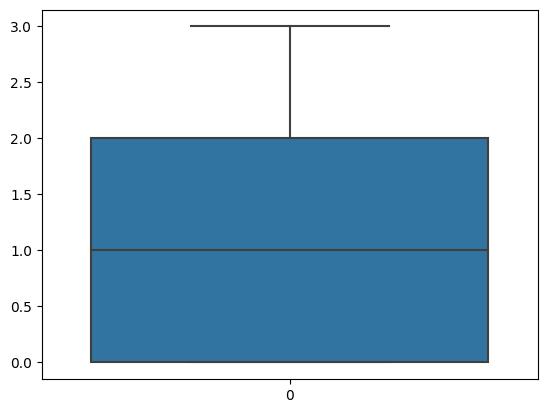

trestbps


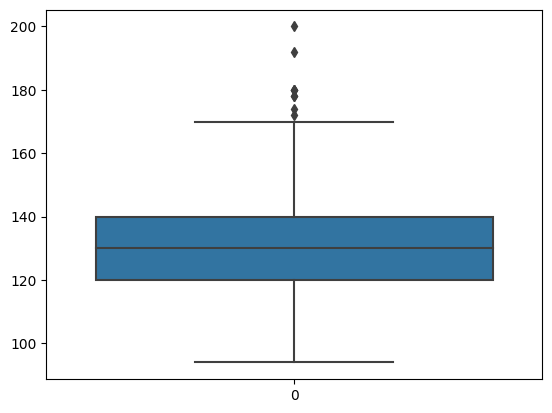

chol


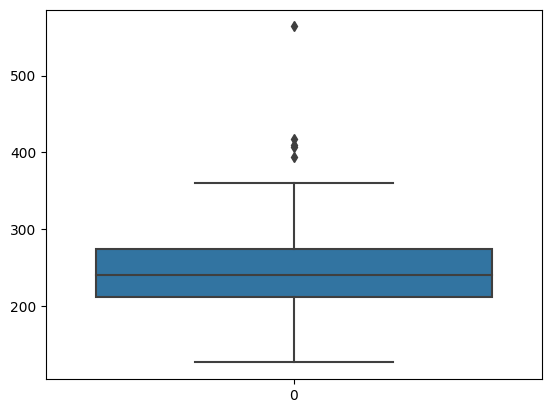

fbs


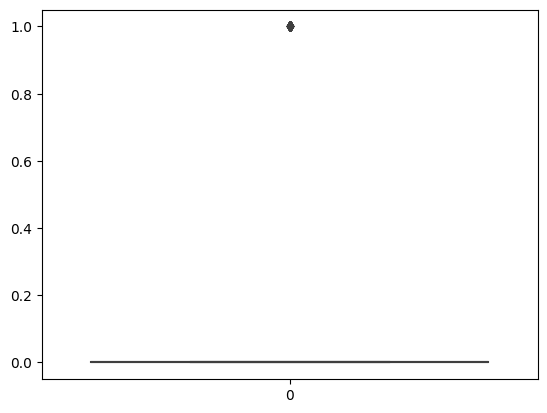

restecg


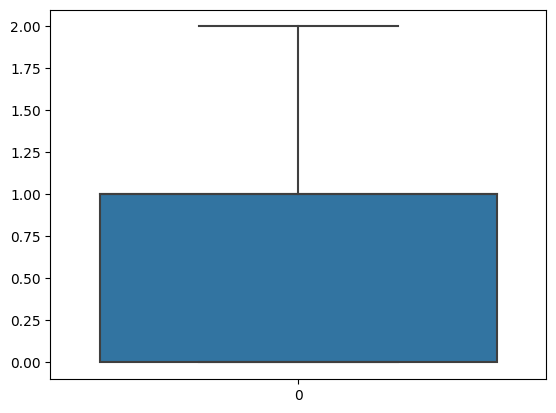

thalach


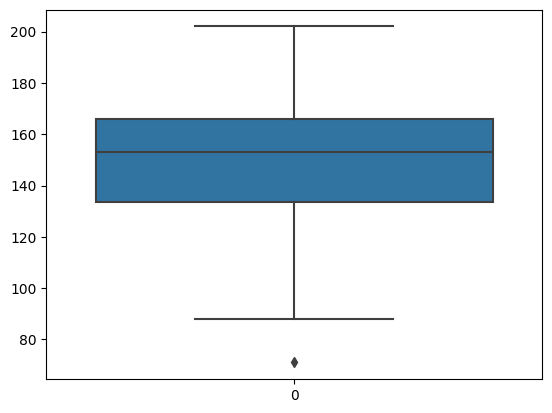

exang


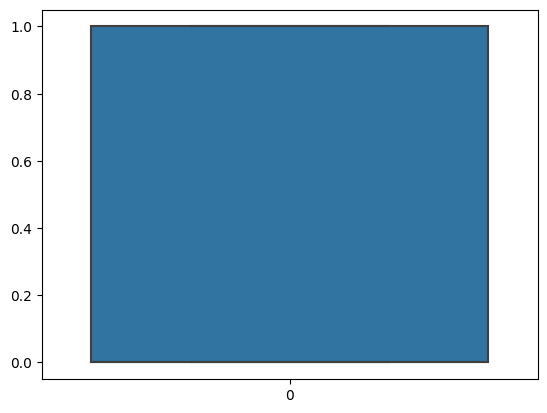

oldpeak


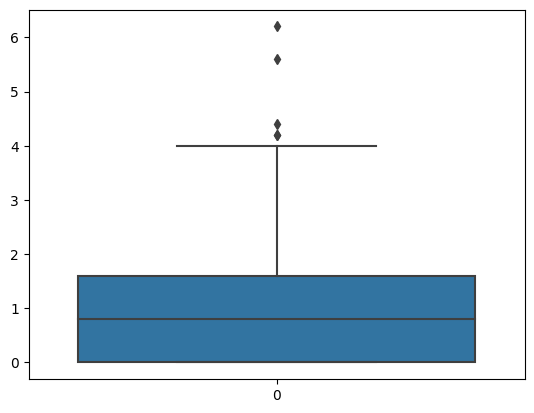

slope


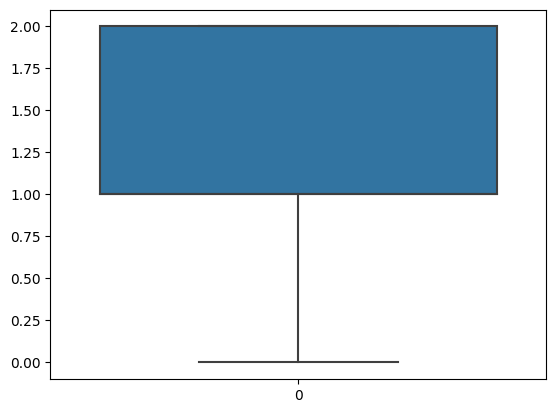

ca


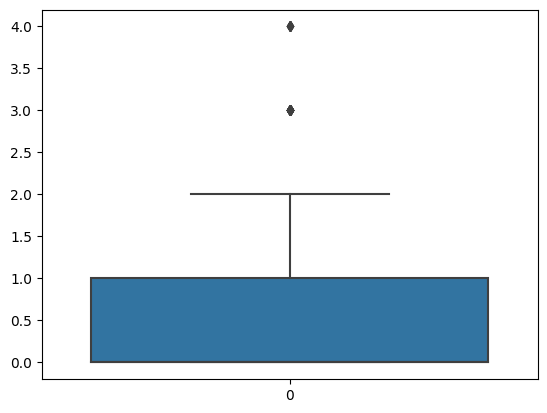

thal


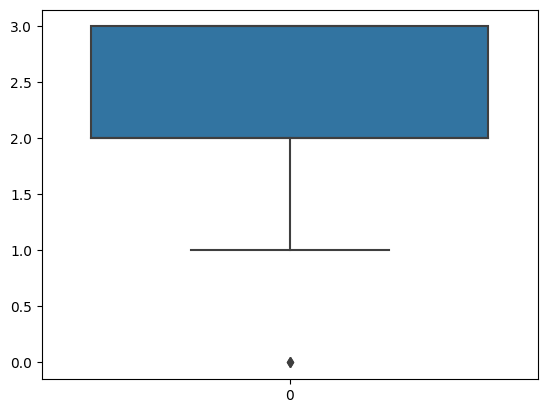

target


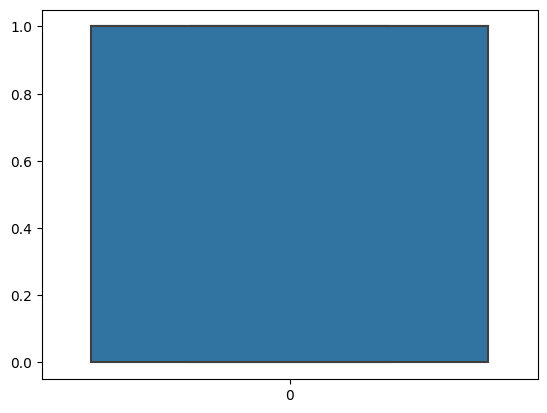

In [ ]:
for i in df.columns:
  print(i)
  sns.boxplot(df[i])
  plt.show()

<Axes: >

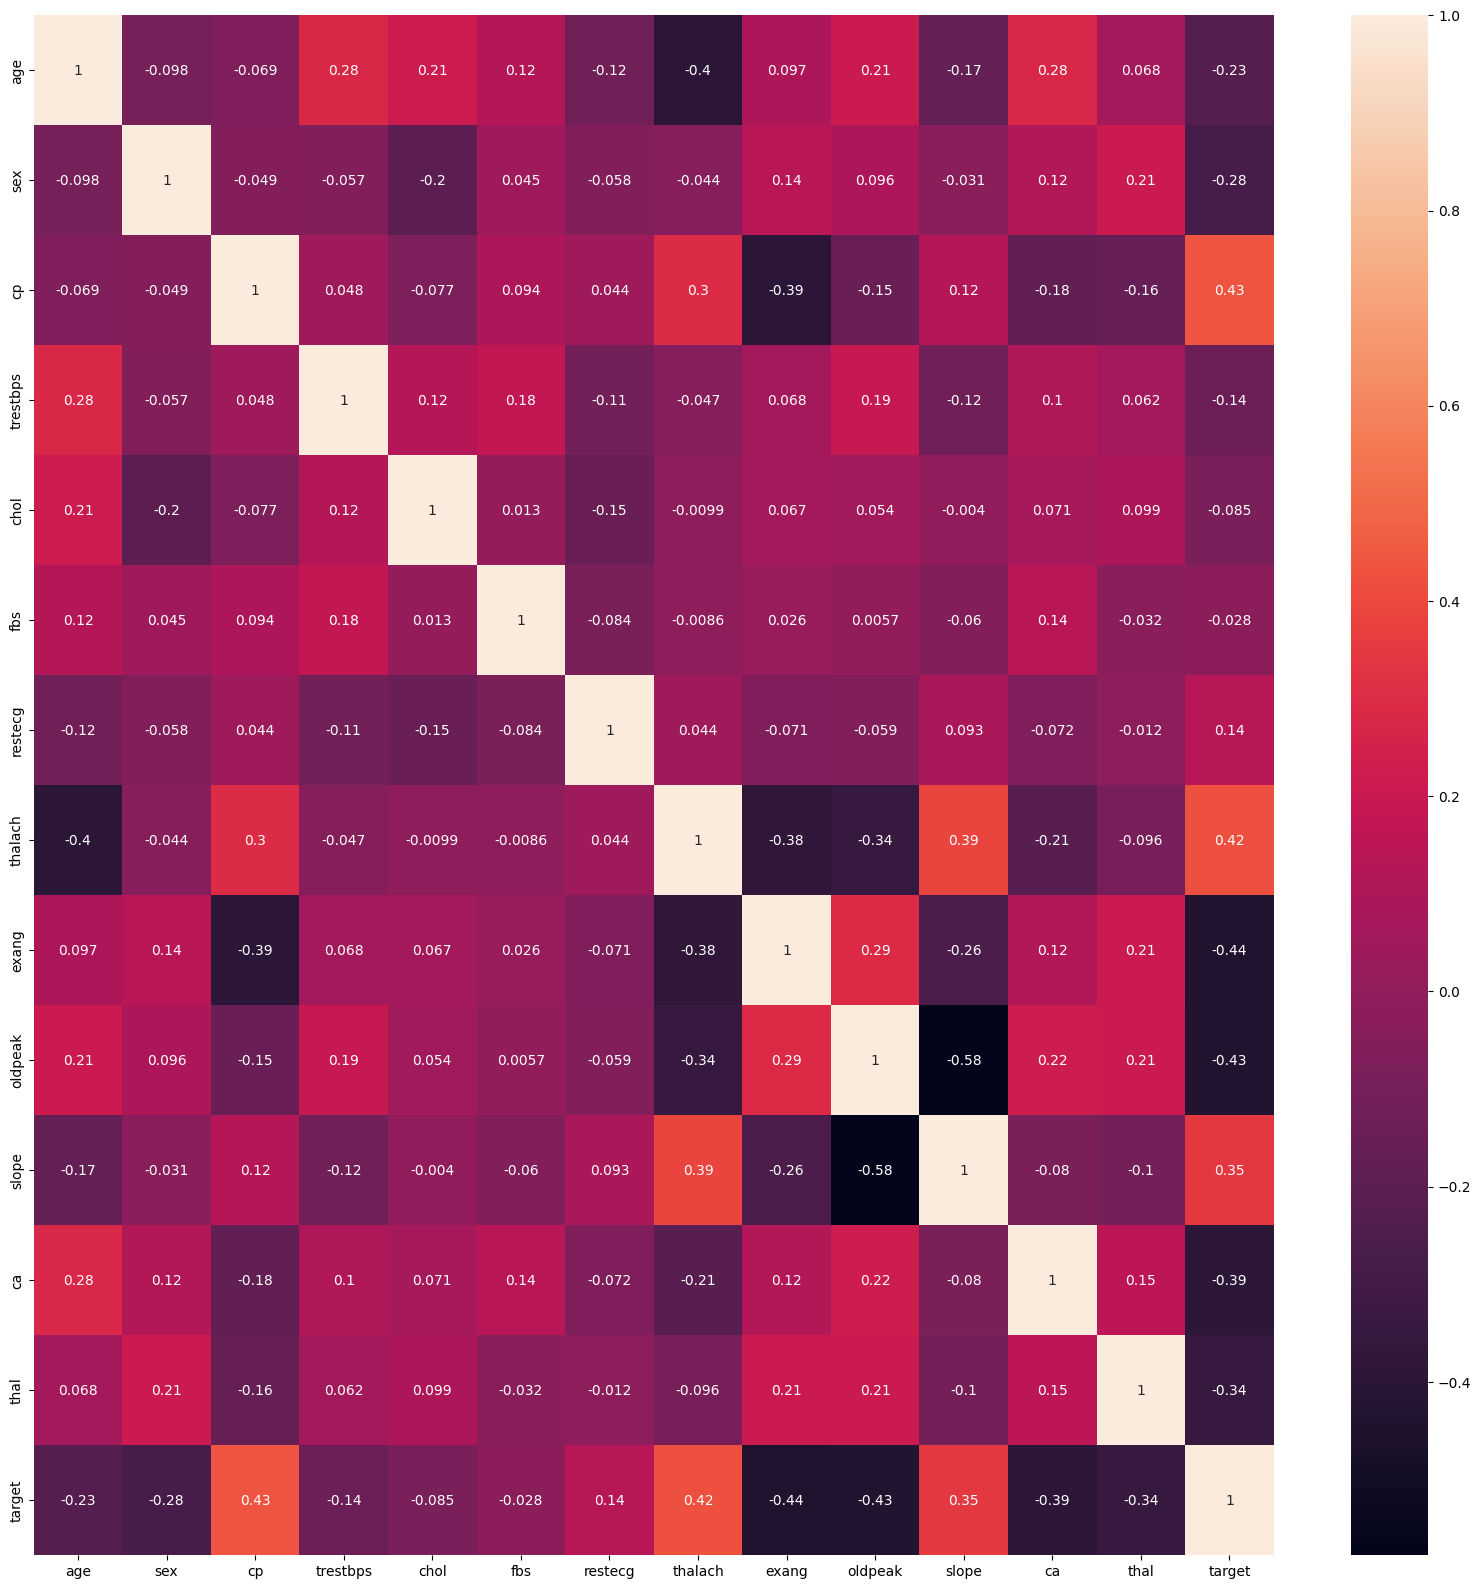

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df=df.drop('fbs',axis=1)

AS this dataset is related to the healthcare outliers need not to be removed


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Training the models with the dataset

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.cluster import KMeans
import graphviz

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('target',axis=1),df.target,test_size=0.3,random_state=42)

Logisticregression

confusion matrix:
 [[32  8]
 [ 9 42]]
r2_score; 24.166666666666647 %


<Axes: >

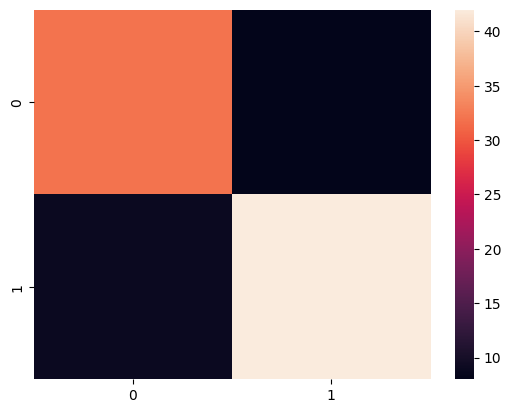

In [ ]:
h=LogisticRegression(max_iter=10000)
h.fit(x_train,y_train)
print('confusion matrix:\n',confusion_matrix(h.predict(x_test),y_test))
print('r2_score;',r2_score(h.predict(x_test),y_test)*100,'%')
sns.heatmap(confusion_matrix(h.predict(x_test),y_test))

Decision Tree

confusion matrix:
 [[33 14]
 [ 8 36]]
accuracy score 75.82417582417582 %


<Axes: >

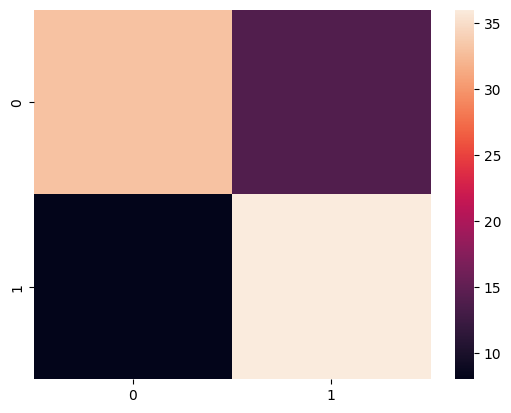

In [ ]:
k=DecisionTreeClassifier()
k.fit(x_train,y_train)
print('confusion matrix:\n',confusion_matrix(k.predict(x_test),y_test))
print('accuracy score',accuracy_score(k.predict(x_test),y_test)*100,'%')
sns.heatmap(confusion_matrix(k.predict(x_test),y_test))

RandomForestClassifier

confusion matrix:
 [[32  8]
 [ 9 42]]
accuracy score 81.31868131868131 %


<Axes: >

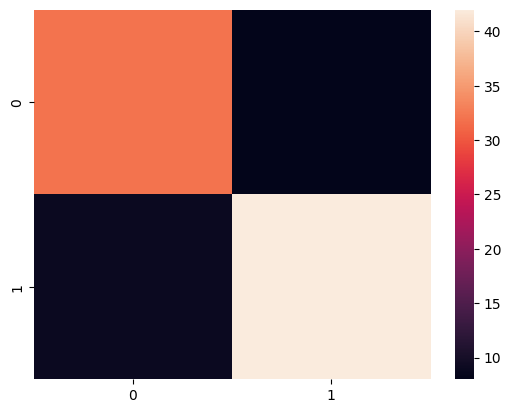

In [ ]:
g=RandomForestClassifier(n_estimators=10000)
g.fit(x_train,y_train)
print('confusion matrix:\n',confusion_matrix(g.predict(x_test),y_test))
print('accuracy score',accuracy_score(g.predict(x_test),y_test)*100,'%')
sns.heatmap(confusion_matrix(h.predict(x_test),y_test))

Selecting the best model

In [ ]:
print('LogisticRegression:\n\n',classification_report(h.predict(x_test),y_test),'\n\n\n')
print('DecisionTreeClassifier:\n\n',classification_report(k.predict(x_test),y_test),'\n\n\n')
print('RandomForestClassifier:\n\n',classification_report(g.predict(x_test),y_test))

LogisticRegression:

               precision    recall  f1-score   support

           0       0.78      0.80      0.79        40
           1       0.84      0.82      0.83        51

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91
 



DecisionTreeClassifier:

               precision    recall  f1-score   support

           0       0.80      0.70      0.75        47
           1       0.72      0.82      0.77        44

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91
 



RandomForestClassifier:

               precision    recall  f1-score   support

           0       0.78      0.80      0.79        40
           1       0.84      0.82      0.83        51

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81   

Of all the selected models, Random Forest classification performs well with a good accuracy